## PROBLEM 3

### Identify Prescription Patterns:
- Discover the different patterns in which "Target Drug" is prescribed or administered to patients.
Patterns could include the timing and frequency of prescriptions.

### Cluster Analysis:
- Utilize clustering or other unsupervised techniques to group patients or prescriptions based on similar patterns.
Identify dominant clusters that represent the most common prescription patterns.
Visualize Patterns Over Time:

### Create visualizations to represent the prescription patterns.
- Plot the patterns with time (X-axis, in months) and the number of prescriptions (Y-axis).

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [43]:
df_train = pd.read_parquet("train.parquet")  # loading parquet file

In [44]:
# only who are all taking target drug
df_pos = df_train[df_train['Incident'] == 'TARGET DRUG']

#removing space in the TARGET_DRUG which  create problems in model building
df_train['Incident'] = df_train['Incident'].replace('TARGET DRUG', 'TARGET_DRUG')

In [45]:
# converting dates to month
df_pos['Month'] = pd.to_datetime(df_pos['Date']).dt.to_period('M')

In [46]:
# Creating a pivot table with patient - month prescription counts
pivot_table = pd.pivot_table(df_pos, index='Patient-Uid', columns='Month', values='Incident', aggfunc='count', fill_value=0)

In [47]:
pivot_table.head() 

Month,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
Patient-Uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0
a0e9c414-1c7c-11ec-889a-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,0,0,0,2,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,1,0,1,0,1,0,1,0,0


## SCALING DATA

In [48]:
ss = StandardScaler()
scaled_data = ss.fit_transform(pivot_table)

In [49]:
scaled_data

array([[-0.01032906, -0.01306576, -0.01032906, ...,  1.17986348,
         1.45426899,  4.73048535],
       [-0.01032906, -0.01306576, -0.01032906, ..., -0.62585738,
        -0.54665828, -0.20480343],
       [-0.01032906, -0.01306576, -0.01032906, ..., -0.62585738,
        -0.54665828, -0.20480343],
       ...,
       [-0.01032906, -0.01306576, -0.01032906, ..., -0.62585738,
         1.45426899, -0.20480343],
       [-0.01032906, -0.01306576, -0.01032906, ...,  1.17986348,
        -0.54665828, -0.20480343],
       [-0.01032906, -0.01306576, -0.01032906, ...,  1.17986348,
         1.45426899, -0.20480343]])

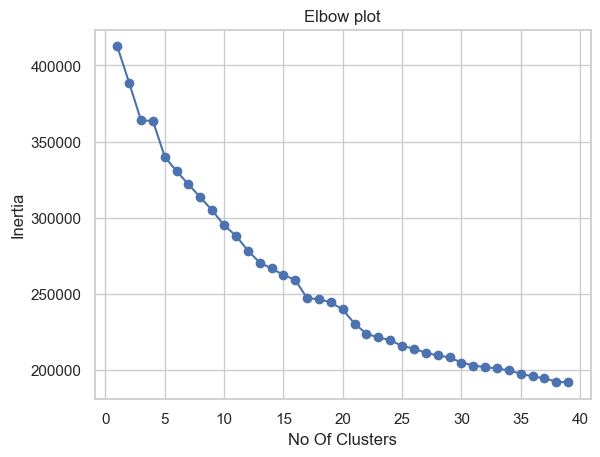

In [50]:
# Determining the optimal number of clusters using elbow-method
uniform_line = []
for n_clusters in range(1, 40):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    uniform_line.append(kmeans.inertia_)

# Plotting the elbow method to find the optimal number of clusters
plt.plot(range(1, 40), uniform_line)
plt.scatter(range(1, 40), uniform_line)
plt.xlabel('No Of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()



## CLUSTERING

In [51]:
# Choosing the optimal number of clusters and applying K-Means clustering
no_of_clusters = 17  # can change 'no_of_clusters' as per need

kmeans = KMeans(n_clusters=no_of_clusters, random_state=42)# Applying K-Means clustering
patient_cluster_labels = kmeans.fit_predict(scaled_data)

# Creating dictionary to map patient IDs to cluster labels
patient_to_cluster = dict(zip(pivot_table.index, patient_cluster_labels))

# Adding cluster labels to the original DataFrame
df_pos['Cluster'] = df_pos['Patient-Uid'].map(patient_to_cluster)



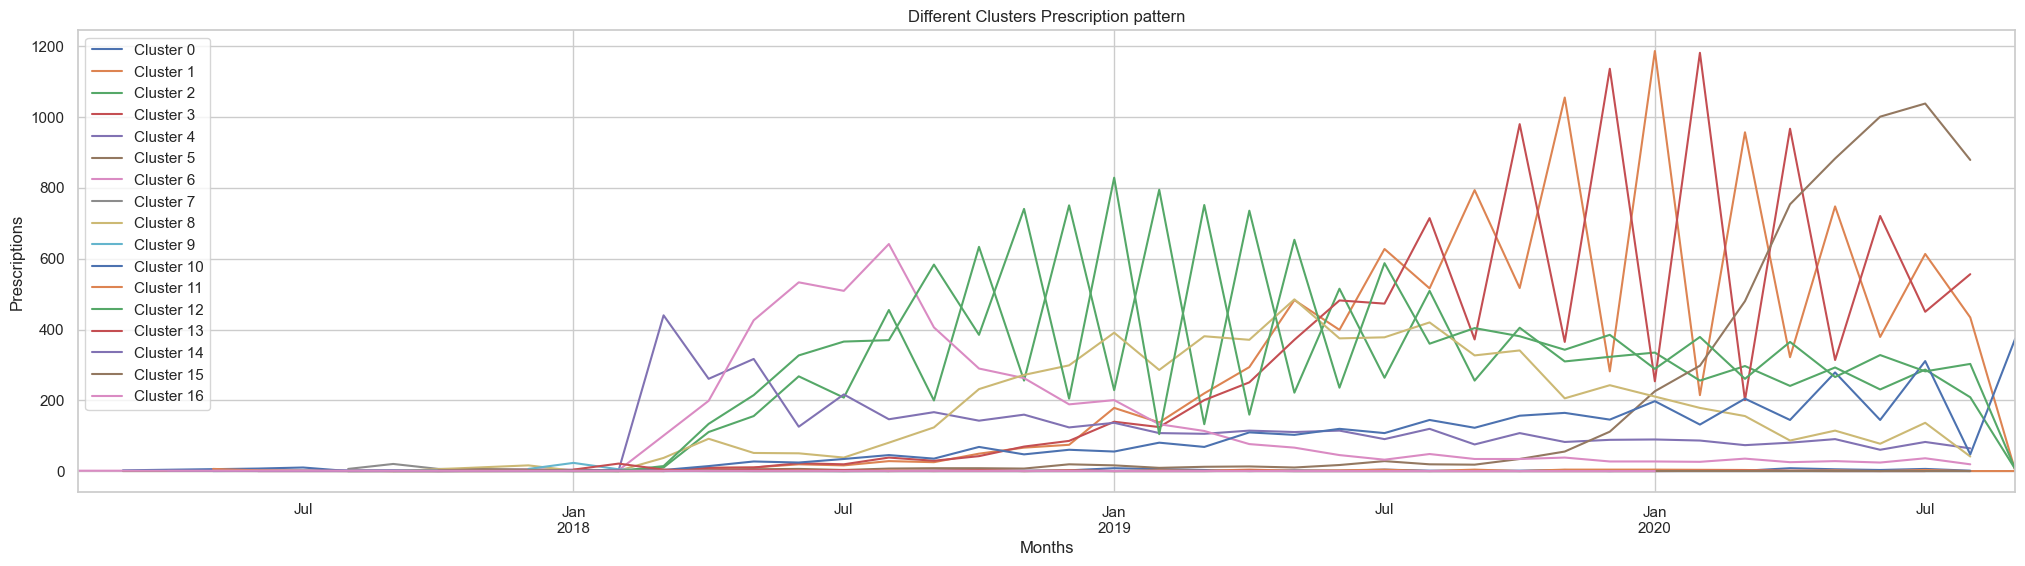

In [52]:
sns.set(style='whitegrid')
plt.figure(figsize=(25, 6))

# Looping through each cluster to create line plots
for clus in range(no_of_clusters):
    cluster_data = df_pos[df_pos['Cluster'] == clus] # Filtering the data for the current cluster
    prescription_counts = cluster_data.groupby('Month')['Incident'].count() # Plotting the prescription counts for the current cluster, with a label
    prescription_counts.plot(label=f'Cluster {clus}') # Plotting the prescription counts for the current cluster, with a label

plt.xlabel('Months')
plt.ylabel('Prescriptions')
plt.title('Different Clusters Prescription pattern')
plt.legend()
plt.show()